In [55]:
#1.librerías
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [56]:
df = pd.read_csv("World Happiness Report 2022 (1).csv")

Elegi este dataset por que es un dataset multivariable y estructurado:

Incluye indicadores como PIB per cápita, esperanza de vida, libertad, generosidad, percepción de corrupción, etc.

Estas variables son cuantitativas y comparables, lo que lo hace perfecto para aplicar K-means.

Permite identificar patrones ocultos entre países

Más allá del ranking de felicidad, el clustering agrupa países con características socioeconómicas y sociales similares.

Ejemplo: países con alto PIB y baja corrupción pueden caer en un mismo cluster, aunque estén en continentes distintos.

Es un caso con sentido social y práctico

Relaciona la tecnología con un problema real: el bienestar y la felicidad global.

Sirve para mostrar cómo los datos ayudan a entender fenómenos sociales y económicos.

Es fácilmente interpretable y visualizable

Puedes mostrar los clusters en gráficos 2D (PIB vs Salud) o incluso en un mapa mundi por colores.

Esto hace que los resultados sean comprensibles tanto para expertos como para personas no técnicas.

In [57]:
# Mostrar primeras filas
print("Vista previa del dataset:")
display(df.head())

print("\nInformación del dataset:")
df.info()

Vista previa del dataset:


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    f

Introduccion a los datos:
Este dataset se trata de una encuesta de felicidad en diferentes paises y utilizamos la tecnica de kmeans para clusterizar mejor los paises por su nivel de felicidad que se define por unas variables

In [58]:
#3.Preparación y limpieza de datos
# Revisar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64


In [59]:
# Eliminar nulos si existen
df = df.dropna()

In [60]:
# Renombrar columnas para facilidad (opcional)
df = df.rename(columns={
    'Happiness score': 'Score',
    'Explained by: GDP per capita': 'GDP',
    'Explained by: Healthy life expectancy': 'Health',
    'Explained by: Freedom to make life choices': 'Freedom',
    'Explained by: Perceptions of corruption': 'Corruption',
    'Explained by: Generosity': 'Generosity'
})


In [61]:
# Selección de columnas relevantes para el clustering
features = ['GDP', 'Health', 'Freedom', 'Corruption', 'Generosity']
df_model = df[features]


In [62]:
# Escalar los datos (muy importante para K-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)

In [63]:
# Convertir a DataFrame escalado
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [64]:
print("\nDatos preparados y escalados:")
display(df_scaled.head())


Datos preparados y escalados:


,GDP,Health,Freedom,Corruption,Generosity
0,1.145968,1.074531,1.505066,2.984171,-0.465089
1,1.291131,1.085912,1.388114,2.968432,0.492316
2,1.250676,1.233865,1.381234,0.285018,1.486078
3,1.464851,1.341984,1.099173,2.409715,-0.004565
4,1.272094,1.142817,0.920305,2.079207,1.498197


In [65]:
# 4. Análisis exploratorio inicial (EDA)
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df_model.describe())


Estadísticas descriptivas:


,GDP,Health,Freedom,Corruption,Generosity
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.410445,0.586171,0.517226,0.154781,0.147377
std,0.421663,0.176336,0.145859,0.127514,0.082799
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.095500,0.463250,0.440500,0.068250,0.089000
50%,1.445500,0.621500,0.543500,0.119500,0.132500
75%,1.784750,0.719750,0.626000,0.198500,0.197750
max,2.209000,0.942000,0.740000,0.587000,0.468000


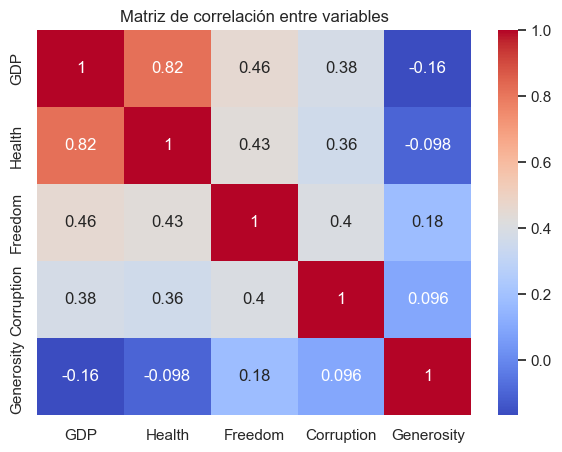

In [66]:
# Matriz de correlación
plt.figure(figsize=(7,5))
sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre variables")
plt.show()

Factores más importantes para la felicidad
GDP y Health (0.82): La correlación más fuerte indica que la prosperidad económica y la salud van de la mano como pilares fundamentales de la felicidad de un país.
GDP y Freedom (0.46) / Health y Freedom (0.43): Los países más felices tienden a tener mayor libertad económica y personal, junto con mejor salud y economía.
Hallazgos interesantes sobre la felicidad
Paradoja de la generosidad:

GDP y Generosity (-0.16)
Health y Generosity (-0.098)

Los países más ricos y saludables (presumiblemente más felices) son menos generosos. Esto sugiere que la prosperidad individual no necesariamente se traduce en altruismo.
El factor corrupción:

Las correlaciones positivas con GDP (0.38) y Health (0.36) sugieren que incluso países con cierta corrupción pueden tener altos niveles de felicidad si tienen buena economía y salud.

Conclusión sobre la felicidad
La prosperidad económica y la salud son los predictores más fuertes de la felicidad nacional, seguidos por las libertades. La generosidad parece tener una relación inversa con la prosperidad, mientras que la corrupción no impide completamente la felicidad si otros factores están presentes.

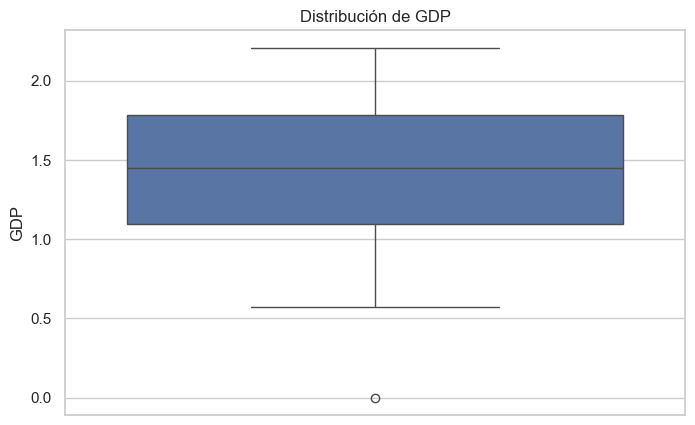

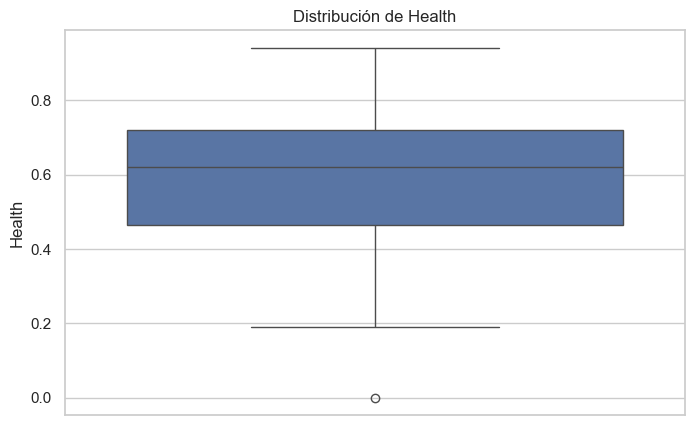

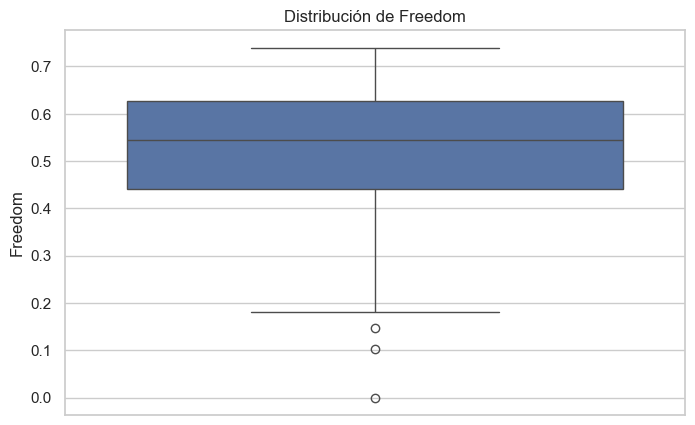

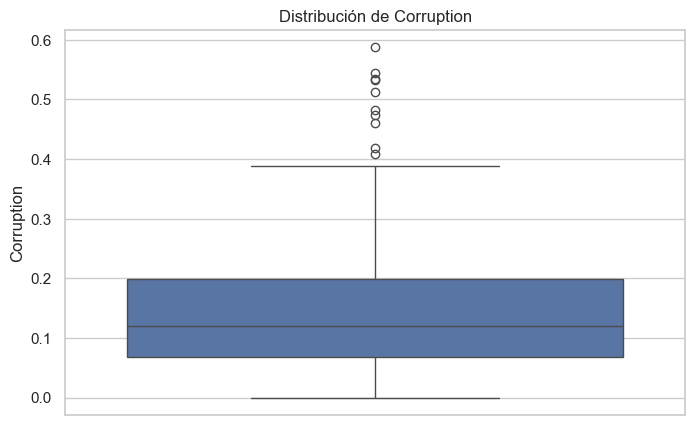

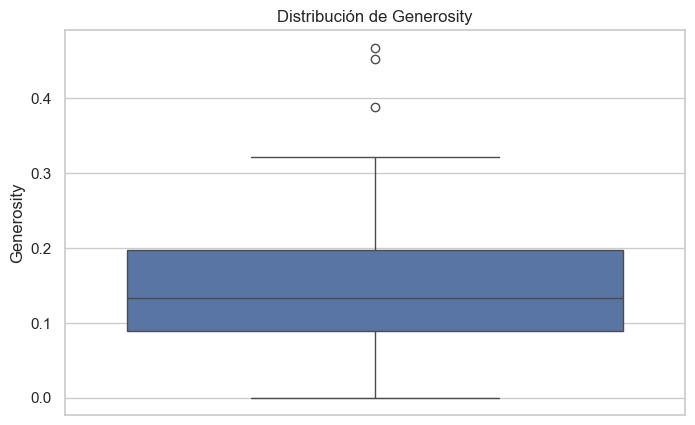

In [67]:
# Boxplots para ver outliers
for col in features:
    plt.figure()
    sns.boxplot(y=df_model[col])
    plt.title(f"Distribución de {col}")
    plt.show()

C:\Users\santi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\santi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\santi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\santi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

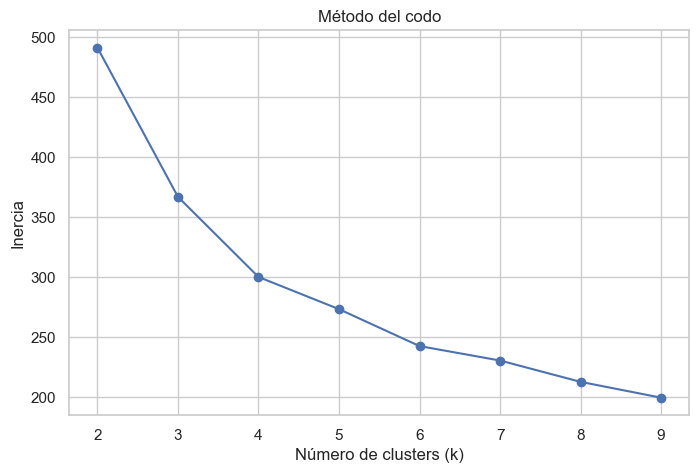

In [68]:
# 6. Determinación del número óptimo de clusters (K)
# Método del codo
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.show()

In [69]:
# Silhouette Score (opcional)
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    print(f"k={k} => Silhouette Score: {sil:.3f}")

k=2 => Silhouette Score: 0.310
k=3 => Silhouette Score: 0.330
k=4 => Silhouette Score: 0.307
k=5 => Silhouette Score: 0.254


C:\Users\santi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\santi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\santi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\santi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

In [70]:
# 7. Aplicación de K-means

# Usamos k=3 como ejemplo (según codo/silueta)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Mostrar resultados
print("\nClusters asignados:")
display(df[['Country', 'Score', 'Cluster']].head(10))


Clusters asignados:


C:\Users\santi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,Country,Score,Cluster
0,Finland,7.821,2
1,Denmark,7.636,2
2,Iceland,7.557,2
3,Switzerland,7.512,2
4,Netherlands,7.415,2
5,Luxembourg*,7.404,2
6,Sweden,7.384,2
7,Norway,7.365,2
8,Israel,7.364,0
9,New Zealand,7.200,2


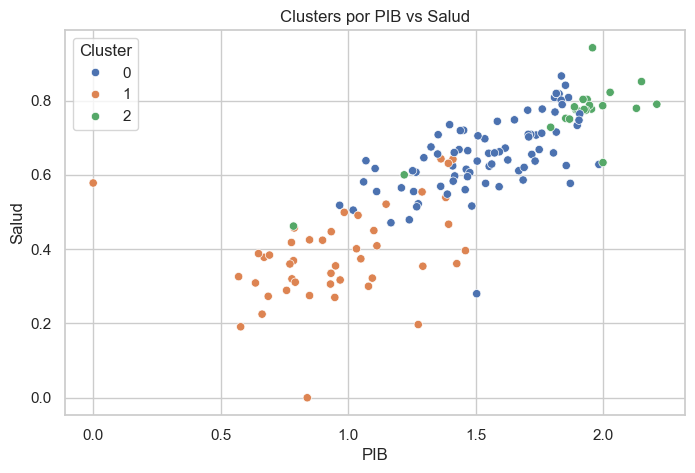

In [71]:
# Visualización de clusters
plt.figure()
sns.scatterplot(x=df['GDP'], y=df['Health'], hue=df['Cluster'], palette="deep")
plt.title("Clusters por PIB vs Salud")
plt.xlabel("PIB")
plt.ylabel("Salud")
plt.show()

Cómo interpretarlos:

Cada punto = un país (con su PIB, salud, libertad, etc.).

Cada color (azul, naranja, verde) = un grupo (cluster) de países que comparten características similares en esas variables.

El algoritmo los agrupa para que los países dentro de un mismo cluster sean más parecidos entre sí y más diferentes de los de otros clusters.

En tu gráfico, como pusiste PIB (GDP) en el eje X y Salud (Health) en el eje Y:

Los azules son países con cierto rango de PIB y salud, agrupados por similitudes en todas las variables.

Los naranjas son países que tienden a tener PIB y salud más bajos (en general).

Los verdes son países con PIB y salud más altos, bastante diferenciados del resto.

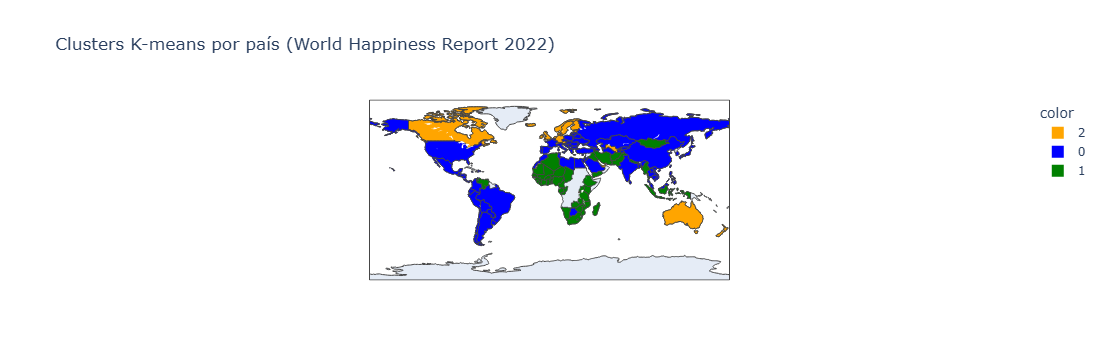

In [74]:
import plotly.express as px

# Ajustamos nombres de países que puedan dar conflicto
country_fix = {
    "Congo (Brazzaville)": "Congo",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",
    "Ivory Coast": "Côte d'Ivoire",
    "Swaziland": "Eswatini",
    "Czech Republic": "Czechia",
    "South Korea": "South Korea",
    "North Macedonia": "North Macedonia",
    "United States": "United States",
    "Viet Nam": "Vietnam",
    "Hong Kong S.A.R. of China": "Hong Kong"
}
df["Country_plotly"] = df["Country"].replace(country_fix)

# Asignar colores personalizados a los clusters
color_map = {
    "0": "blue",
    "1": "green",
    "2": "orange"
}

# Crear mapa mundial por clusters con colores definidos
fig = px.choropleth(
    df,
    locations="Country_plotly",
    locationmode="country names",
    color=df["Cluster"].astype(str),  # convertir a string para mapear colores
    title="Clusters K-means por país (World Happiness Report 2022)",
    color_discrete_map=color_map
)

fig.show()
